# Homework3 by Group3

Authors:Kaiyang LIN,Tianhao MOU,Lin LIU,Yunxia SHI,Guangyi NING

# Matplotlib

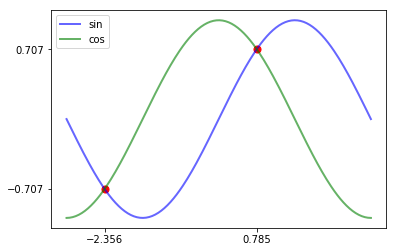

In [92]:
###Exercise1
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
from scipy.optimize import newton

fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 200)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, 'b-', linewidth=2, label='sin', alpha=0.6)
ax.plot(x, z, 'g-', linewidth=2, label='cos', alpha=0.6)
f = lambda x: np.sin(x) - np.cos(x)
#annotate(r'$\sin(newton(f, -2)) = sin(newton(f, -2))$')
plt.scatter([newton(f, -2),], [np.sin(newton(f, -2)),], s=50, color='r')
plt.scatter([newton(f, 0),], [np.cos(newton(f, 0)),], s=50, color='r')
ax.legend()
ax.set_xticks([newton(f, -2),newton(f, 0)])
ax.set_yticks([np.sin(newton(f, -2)),np.cos(newton(f, 0))])
plt.show()


# Scipy

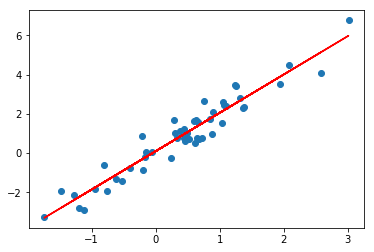

In [93]:
###Exercise_1
from scipy import stats
import numpy as np
import pylab

x = np.random.randn(50)
y = 2 * x + 0.5 * np.random.randn(50)

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

    # Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'r-')
pylab.show()

In [1]:
###Exercise_2
from scipy.optimize import fsolve
def f(x):
    x0,x1 = x.tolist()
    return [
        x0**2-3*x0+7-385,
        x1**2-3*x1+7-385,
    ]

r = fsolve(f, [1,3])
print(r)


[-18.  21.]


In [2]:
###Exercise_3
import numpy as np

def bisection_f (f, a, b):
    if (f(a) * f(b) > 0):
        return 'No root'
    if (f(a) > 0 and f(b) <0):
        temp1 = b
        b = a
        a = b
        return bisection_f (f, a, b)
    else:
        if abs(f(a)) < 0.0001:
            return a
        if abs(f(b)) < 0.0001:
            return b
        else:
            if 0 < f((a + b) / 2):
                return bisection_f(f, a, (b + a) / 2)
            if f((a + b) / 2) < 0:
                return bisection_f(f, (b + a) / 2, b)
     
print (bisection_f(lambda x: 2 * x + 1, 0, 10))
print (bisection_f(lambda x: 2 * x + 1, -10, 10))
   

No root
-0.500030517578125


# Additional-Exercises 

In [5]:
###Exercise_1
##Method_1 with loop
import numpy as np
import time
n=10000000
np.random.seed(0)
x=np.random.normal(0,1,n)
start=time.time()
for i in range(n):     
    x[i]=0 if x[i]<0 else x[i]
end=time.time()
print(end-start)

##Method_2 without loop
n=10000000
np.random.seed(0)
x=np.random.normal(0,1,n)
%time np.where(x > 0, x ,0)

##Method_3 without loop
import numpy as np
n=10000000
np.random.seed(0)
x=np.random.normal(0,1,n)
%time x[x<0]=0

##Method_4 without loop
def f(x): return x if x > 0 else 0
f = np.vectorize(f)
n=10000000
np.random.seed(0)
x=np.random.normal(0,1,n)
%time x=f(x)

4.556260585784912
Wall time: 68 ms
Wall time: 84 ms
Wall time: 2.11 s


In [7]:
###Exercise_2
import numpy as np
def get_matrix(k):
    return np.array([np.linspace(0, 4 * (k - 1) ,k,dtype=int), np.linspace(1, 4 * (k - 1) + 1, k,dtype=int), np.linspace(2, 4 * (k - 1) + 2, k,dtype=int), np.linspace(3, 4 * (k - 1) + 3, k,dtype=int)])
print (get_matrix(10))

[[ 0  4  8 12 16 20 24 28 32 36]
 [ 1  5  9 13 17 21 25 29 33 37]
 [ 2  6 10 14 18 22 26 30 34 38]
 [ 3  7 11 15 19 23 27 31 35 39]]


In [190]:
###Exercise_3
import numpy as np
def gcd(a, b, i):
    if a < b:
        temp = a
        a = b
        b = temp
    else:
        print ( i , ':','gcd(', a, ',', b, ')')
        if a % b == 0:
            print ('The Greatest Common Divisor is', b)
        else:
            r = a % b
            i +=  1
            gcd(b, r, i)
gcd(123456,7890, 0)

def lcm(a, b):
    if a % b == 0:
        print ('The Least Common Multiple is', a)
    if b % a == 0:
        print ('The Least Common Multiple is', b)
    else:
        r = max(a,b)
        for i in range(r, a * b):
            if i % a == 0 and i % b == 0:
                print ('The Least Common Multiple is', i)
                break
        

print (lcm(15,20))


0 : gcd( 123456 , 7890 )
1 : gcd( 7890 , 5106 )
2 : gcd( 5106 , 2784 )
3 : gcd( 2784 , 2322 )
4 : gcd( 2322 , 462 )
5 : gcd( 462 , 12 )
6 : gcd( 12 , 6 )
The Greatest Common Divisor is 6
The Least Common Multiple is 60
None


In [12]:
###Exercise_3
import numpy as np
def gcd(a, b, i):
    if a < b:
        temp = a
        a = b
        b = temp
        return gcd(a, b, i)
    else:
        print ( i , ':','gcd(', a, ',', b, ')')
        if a % b == 0:
            print ('The Greatest Common Divisor is', b)
        else:
            r = a % b
            i +=  1
            return gcd(b, r, i)
gcd(7890,123456, 0)

0 : gcd( 123456 , 7890 )
1 : gcd( 7890 , 5106 )
2 : gcd( 5106 , 2784 )
3 : gcd( 2784 , 2322 )
4 : gcd( 2322 , 462 )
5 : gcd( 462 , 12 )
6 : gcd( 12 , 6 )
The Greatest Common Divisor is 6


In [16]:
###Exercise_4
x='This is           for removing       redundant spaces'
' '.join(x.split())

'This is for removing redundant spaces'

In [1]:
###Exercise_5
##Method_1
def filterTheList(z):
    return list(filter(lambda x: x % 3 == 0, z))
y = filterTheList( [2, 18, 9, 22, 17, 24, 8, 12, 27])
print(y)
    
##Method_2   
import numpy as np
x=np.array([2, 18, 9, 22, 17, 24, 8, 12, 27])
y=x[x%3==0]
print(y)

[18, 9, 24, 12, 27]
[18  9 24 12 27]


In [30]:
###Exercise_6
import re
f=open('test.txt','w')
f.write('Suppose initially the only prime number that your program knows is 2.Read a text file, get the 20 most frequent words from the text file, output the words as well as their counts.You should exclude punctuations such as ", . ! # $ ...". You should provide a dictionary to your code which exclude counting any word in this list, e.g., a dictionray may look like this: [to, a, as, this, for, in, on, but]..In other words, only count English words.You may need some knowledge on regular expressions and its usage in Python.Given a large integer N, find out all the prime numbers less than N. You may optimize your program in multiple passes, and compare their performance to evaluate your improvent.')
f.close()

f=open('test.txt','r')
x=f.read()
y1=x.lower()
y2='[a-z]+'
y3=re.findall(y2,y1)
dt={}
for i in y3:
    dt[i]=dt.setdefault(i,0)+1
words=dt.keys()
times=dt.values()
new_dt=sorted(dt.items(),key=lambda x:x[1],reverse=True)
new_dt[20:]=[]
print(new_dt)
new_x=dict(new_dt)
new_x_key=new_x.keys()
print(new_x_key)

[('the', 5), ('a', 5), ('in', 5), ('your', 4), ('words', 4), ('as', 4), ('you', 4), ('to', 3), ('this', 3), ('may', 3), ('only', 2), ('prime', 2), ('program', 2), ('text', 2), ('file', 2), ('their', 2), ('should', 2), ('exclude', 2), ('on', 2), ('and', 2)]
dict_keys(['the', 'a', 'in', 'your', 'words', 'as', 'you', 'to', 'this', 'may', 'only', 'prime', 'program', 'text', 'file', 'their', 'should', 'exclude', 'on', 'and'])


In [15]:
###Exercise_7
##Method_1
def find_prime1(x):
    import math
    import numpy as np
    f=[]
    f.append(1)
    f.append(2)
    f.append(3)
    for i in range(4, x):
        default = 1
        for j in range(2, np.array(i)//2+1):
            if i % j == 0:
                default = 0
                break
        if default == 1:
            f.append(i)
    return f
            
%time y = find_prime1(100)
print(y)

##Method_2
def find_prime2(x):
    f=[]
    f.append(1)
    for i in range(2, x):
        default = 1
        for j in range(2, i):
            if i % j == 0:
                default = 0
                break
        if default == 1:
            f.append(i)  
    return f        
%time y = find_prime2(100)
print(y)            
    
##Method_3
from math import sqrt    
import numpy as np
N = 99 
%time y = np.array([ p for p in   range(2, N) if 0 not in [ p% d for d in range(2, int(sqrt(p))+1)] ])
print(y)

##Method_4
from itertools import count    
def isPrime(n):    
    if n <= 1:    
        return False   
    for i in count(2):    
        if i * i > n:    
            return True   
        if n % i == 0:    
            return False  
        
def find_prime3(x):
    f=[]
    f.append(1)
    for i in range(2, x):
        if isPrime(i) == True:
            f.append(i)  
    return f 

%time y = find_prime3(100)
print(y)

Wall time: 0 ns
[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Wall time: 0 ns
[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Wall time: 0 ns
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]
Wall time: 0 ns
[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


# Museum Assignment

1.A

2.D

3.It is not a question of control effectiveness;it is question of our policy.